# BUSINESS INTELLIGENCE / BUSINESS ANALYST, LEAD

---------------
## Instructions
---------------

Download the attached .csv file. Preferably upload it to a SQL db and query your way through the challenge. YOUR TASK IS TO exploit the information contained in the aforementioned file as you find fit. Some things to take into consideration:
This database contains credit card information and transactions from multiple customers. Use your favorite data visualization tool / programming language to explore the data and present the results (R, Python, PowerBI, Spotfire, etc…). 

-------------------------
## Data Dictionary
-------------------------

The database has the following architecture:

**ID**: This is the user’s unique identifier.
    
**UPDATE**: Date when the event happened.
    
**STATUS**: The event, which can take the following values:
- EMPTY - The user did not respond to the communication OR there was a transaction (this is reflected in the TXN column).
- RESPONSE – The customer responded to the MKT campaign.
- RISK – The customer was checked on the risk model whether the customer is fit to get a credit or not. 
- REJECTED – The risk model determined the customer is not fit to get a credit. 
- APPROVED – The risk model determined the customer as fit to get a credit. The customer is granted a credit. Here some of the other columns are populated.
- DELIVERED – The customer received a physical credit card.

**MOTIVE**: The reason of rejection OR the type of card. 
    
**INTEREST RATE**: The interest rate of the customer’s credit card.
    
**AMOUNT**: The amount of the credit granted to the customer.
    
**CAT**: The annual cost of the credit granted to the customer.
    
**TXN**: The amount of each transaction for each customer. 
    
**CP**: Zip Code where the physical credit card was delivered to.
    
**DELIVERY_SCORE**: A score the customer gives to the delivery company for the delivery service. 

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read dataset

In [2]:
rappi=pd.read_csv("BusinessBIBA_Challenge.csv")

## Exploring the dataset

#### head of data

In [5]:
rappi.head()

,Unnamed: 0,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,3,1,08:23.4,NaN,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### General information of the data

In [6]:
rappi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12756 non-null  int64  
 1   ID              12756 non-null  int64  
 2   UPDATE          12756 non-null  object 
 3   STATUS          7940 non-null   object 
 4   MOTIVE          2298 non-null   object 
 5   INTEREST_RATE   1505 non-null   float64
 6   AMOUNT          1505 non-null   float64
 7   CAT             1505 non-null   float64
 8   TXN             3773 non-null   float64
 9   CP              1046 non-null   float64
 10  DELIVERY_SCORE  1046 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.1+ MB


- Here we can see that the dataset have **11 columns and most of them are numbers (int or float)**. The columns that are object, store the status of the MKT strategy.

In [7]:
rappi.isnull().values.any()

True

- As we saw in the head of the data there are some columns with missing valuesm, but is ok because the database is designed to be that way (not all users got by the MKT strategy and not all made transactions)

#### Summary statistics for the numerical variables

In [9]:
rappi.describe()

,Unnamed: 0,ID,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
count,12756.000000,12756.000000,1505.000000,1505.000000,1505.000000,3773.000000,1046.000000,1046.000000
mean,6377.500000,2516.923330,39.695681,14479.800664,39.663787,2009.774234,42298.432122,1.964627
std,3682.484352,1465.606943,5.924762,14520.262941,5.751843,10034.936766,16757.547428,1.116938
min,0.000000,1.000000,30.000000,0.000000,30.000000,0.342075,11560.000000,0.000000
25%,3188.750000,1204.000000,35.000000,3800.000000,35.000000,67.888982,44100.000000,1.000000
50%,6377.500000,2571.000000,40.000000,9800.000000,40.000000,265.086727,44620.000000,2.000000
75%,9566.250000,3801.000000,45.000000,20100.000000,45.000000,1061.080947,53100.000000,3.000000
max,12755.000000,4999.000000,49.000000,108300.000000,49.000000,412498.523200,64000.000000,5.000000


#### - We have 12,756 rows, but we need to be careful some IDs are repeated and that means the user goes in different stages.
- For the 1,505 rows we have data, the mean `interest rate= 39.70%` and the max one is `interest rate= 49,0%`
- For the 1,505 rows we have data, the mean `amount granted= 14,480 mxn` and the max one is `amount granted= 108,300 mxn`
- For the 3,773 rows we have data, the mean `spend= 2,010 mxn` and the max one is `spend= 412,499 mxn`
- These are some interesting findings that can help us to improve our credit card product, the interest rate is not so high and we grant a considerable amount of credit. Also the users spend a good amount of money.

#### Finding unique users in the data set

In [12]:
rappi['ID'].nunique()

3341

- As we said in previous lines, **there are 12,756 rows of information, but only 3,341 unique users.**

#### Users with more than one interaction (TXN)

In [26]:
rappi.groupby(['ID', 'TXN']).count().drop(rappi.columns[[0,2,3,4,5,6,7,9,10]], axis=1)

Empty DataFrame
Columns: []
Index: [(1, 434.1120658), (4, 175.0617647), (4, 360.5041733), (4, 1171.027491), (4, 3719.6183539999997), (11, 45.01147306), (11, 401.91733589999996), (11, 911.9787299000001), (11, 2201.975645), (11, 2691.108286), (17, 28.17714529), (17, 123.8627528), (18, 1131.122678), (20, 18.24583376), (20, 261.9489261), (28, 107.42735829999998), (28, 288.9045753), (31, 30.66072102), (31, 239.9107554), (33, 189.50278500000002), (35, 83.7901251), (35, 96.61347961), (35, 119.3415642), (35, 711.5427222), (35, 827.8906726), (37, 1529.738176), (47, 51.24002299), (49, 594.7261333), (51, 54.19228183), (51, 259.65058309999995), (51, 290.26858210000006), (51, 377.7184525), (51, 534.6157337000001), (53, 77.98098017), (53, 118.44842279999999), (53, 1410.012808), (58, 26.51169819), (58, 35.95594841), (58, 217.3354449), (58, 279.4775294), (59, 575.3818641), (59, 640.7733107999999), (59, 999.1450206000001), (60, 163.5850142), (60, 7959.955537000001), (62, 99.20259856), (62, 126.6828149), (62, 137.3731216), (62, 1054.384175), (64, 373.2864394), (64, 16404.2983), (64, 23157.11791), (65, 35.11541157), (65, 780.6038431), (69, 117.12752749999999), (69, 244.3767827), (69, 558.3251414), (72, 3358.294171), (76, 56.20647139), (77, 18.383233399999998), (77, 81.21768078), (77, 533.3906621), (77, 9461.727153), (79, 2.800887013), (79, 44.99856153), (79, 57.08818007), (79, 4106.537792), (88, 507.35626270000006), (89, 46.09894062), (89, 138.82265049999998), (89, 149.74485819999998), (89, 1355.411819), (89, 1682.415673), (94, 56.89397721), (94, 78.58900052), (94, 772.8277326), (94, 1667.1416390000002), (94, 3797.1491909999995), (99, 125.38536599999999), (99, 459.66389680000003), (99, 7135.489459), (101, 233.34934449999997), (101, 364.6460484), (101, 17477.80799), (104, 20.27548845), (104, 153.8435124), (104, 373.5732293), (115, 1.518921496), (115, 2.532160501), (115, 13.87603499), (115, 356.71063119999997), (115, 1657.53747), (117, 8.981292161), (117, 351.9476371), (117, 6798.163805), (118, 27.65909111), (118, 130.7528602), (118, 196.357069), (118, 257.6856617), (118, 1485.22815), ...]

[3773 rows x 0 columns]

- Here we can see that there are users that have made more than just one transaction, like the 4,999.

In [32]:
count_interactions = rappi.groupby('ID').count()['TXN']
count_interactions

ID
1       1
2       0
3       0
4       4
5       0
       ..
4993    0
4996    0
4997    0
4998    4
4999    5
Name: TXN, Length: 3341, dtype: int64

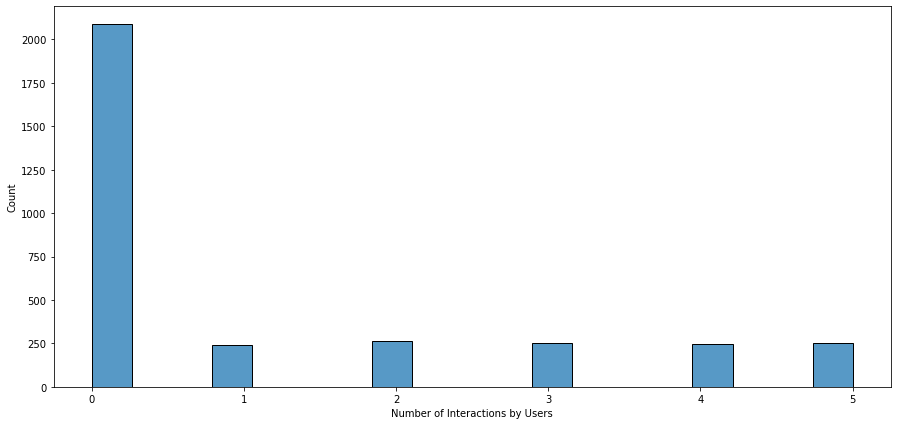

In [33]:
plt.figure(figsize=(15,7))

sns.histplot(count_interactions)

plt.xlabel('Number of Interactions by Users')

plt.show()

- Here we see the same but in a graph. most of them have 0 interactions, but there is an important number of users with more than 2 interactions or transactions.

## Relevant columns using KPIs proposed

- Now that we explored fast the dataset, we still have some categorical variables that have very relevant information, **like the column STATUS**. Let´s see some counts and plots.

In [29]:
rappi['STATUS'].value_counts()

RISK         2298
RESPONSE     2298
APPROVED     1505
DELIVERED    1046
REJECTED      793
Name: STATUS, dtype: int64

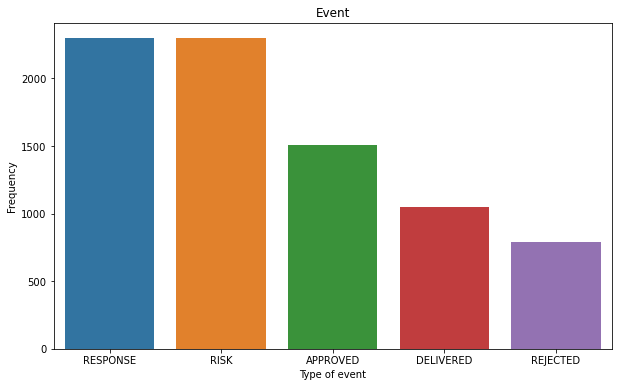

In [31]:
plt.figure(figsize=(10,6))

sns.countplot(x=rappi['STATUS'])

plt.title('Event')

plt.xlabel('Type of event')

plt.ylabel('Frequency')

plt.show()

- Here we can see that the status of Response and Risk have the same number of observations, that means that our data base is complete, **because all the users that react to the MKT camp. were risk evaluated.**
- Now in the case of the approved and rejected users we need to understand that those are subsets of the Response category, if we sum the values `( APPROVED=1,505 + REJECTED= 793 = 2,298)`. Again the information we have good quality.
- The delivered status is a subset of the approved one, since it have lower value we can say that not all the cards are delivered.
- Also we know now the total of users and the ones who interacted with the MKT campaign. `( RESPONSE = 2,298 and Total ID = 3,341; so we have 1,043 users that didnt participated).`
- **With this information we can calculate the KPIs proposed in the word document, we have all we need.**

## KPIs calculation

### Response rate 
= $\text{# of users that started validation process }$  $\div$   $\text{# of total users who received the notification }$

=$\frac{2,298}{3,341} $ $\times 100 $   = $\text 68.78$ $\%  $

### New cardholders rate 
= $\text{# of users that approved validation process }$  $\div$   $\text{# of users that started validation process }$

=$\frac{1,505}{2,298}$ $\times 100 $  = $\text 65.49$ $\%  $

### Rejection rate
= $\text{# of users that failed validation process }$  $\div$   $\text{# of users that started validation process }$

=$\frac{793}{2,298}$ $\times 100 $  = $\text 34.51$ $\%  $

## Recommendations

- I reviewed some sources on the web and i found that the average response rate is more less 40%, and the app surveys and adds have the lowest response rate (~13%, information of Surveyanyplace), and also if we compare our rates with the percentage of electoral participation in Mexico (52.7%) we can say that the MKT strategy is performing very good, but also we know that we can always get better.
- For the response rate i will try to look at more variables, maybe the time the user received the message; if that user made some recent interactions, it could be possible that the user dont care about us; and more sociodemographic variables to try to perform some cluster analysis.
- Respect to the New cardholders rate and rejectio rate, these are complements if we can get up one or get down the other we can get more users with credit cards, but i think is a better approach  analize the group of users that cant pass the risk evaluation, all the information we can get from them can be used to make modifications to the existent conditions of the credit card and help them get it.

## Thanks for your time, hope to see ya all soon!